In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [196]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(2)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
132,tt1877832,250000000,746000000,X-Men: Days of Future Past,Hugh Jackman|James McAvoy|Patrick Stewart|Mich...,Bryan Singer,"To save the future, they must alter the past",The ultimate X-Men ensemble fights a war for t...,131,Action|Adventure|Fantasy|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,5/15/2014,7.6,2014
199,tt0787474,60000000,108255770,The Boxtrolls,Ben Kingsley|Isaac Hempstead Wright|Elle Fanni...,Graham Annable|Anthony Stacchi,When troubles strikes friends stack together,An orphaned boy raised by underground creature...,97,Animation|Comedy|Family|Fantasy,Laika Entertainment,9/10/2014,6.6,2014


# 13. У какого режиссера самые большие суммарные кассовые сбооры?

In [197]:
def director_revenue(df):
    summ = Counter()
    for i in range(len(df)):
        for j in df.iloc[i].director.split('|'):
            summ[j] += df.iloc[i].revenue
    return pd.DataFrame.from_dict(summ, orient='index', columns = ['Summ'])
display(director_revenue(data[data.revenue > 0]).sort_values(by=['Summ'], ascending = False))

,Summ
Peter Jackson,6490593685
Christopher Nolan,4167548502
David Yates,4154295625
Michael Bay,3886938960
J.J. Abrams,3579169916
...,...
David MichÃ´d,2295423
Steven Shainberg,2281089
Paul Schrader,2062066
Keanu Reeves,2054941


# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году?

In [6]:
grouped_2012 = data[(data['release_year'] == 2012)]
grouped_2012.head(2)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
970,tt0848228,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/2012,7.3,2012
971,tt1496025,70000000,132400000,Underworld: Awakening,Kate Beckinsale|Stephen Rea|Michael Ealy|Theo ...,MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein,Vengeance Returns,After being held in a coma-like state for fift...,88,Fantasy|Action|Horror,Lakeshore Entertainment|Saturn Films|Screen Ge...,1/19/2012,6.0,2012


In [7]:
def cast_revenue(df):
    summ = Counter()
    for i in range(len(df)):
        for j in df.iloc[i].cast.split('|'):
            summ[j] += df.iloc[i].revenue
    return pd.DataFrame.from_dict(summ, orient='index', columns = ['Summ'])
display(cast_revenue(grouped_2012[grouped_2012.revenue > 0]).sort_values(by=['Summ'], ascending = False))

,Summ
Chris Hemsworth,2027450773
Denis Leary,1629460639
Anne Hathaway,1522851057
Robert Downey Jr.,1519557910
Mark Ruffalo,1519557910
...,...
Jason Bateman,3428048
Nicolas Cage,2106557
Sami Gayle,2106557
Josh Lucas,2106557


# Вопрос 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [74]:
hi_budget = data[data['budget'] > data['budget'].mean()]
#hi_budget
hi_budget['cast'].str.split('|',expand=True).stack().value_counts()

Matt Damon              18
Adam Sandler            17
Angelina Jolie          16
Tom Cruise              15
Samuel L. Jackson       15
                        ..
Benedict Cumberbatch     1
David Morse              1
Adam Driver              1
Alfre Woodard            1
Gary Cole                1
Length: 1505, dtype: int64

In [72]:
hi_cast = hi_budget['cast'].str.cat(sep='|').split('|')


In [38]:
# Другой вариант
# берем копию отсортированного по высокобюджетности датафрейма:
df = hi_budget.copy()


In [40]:
# проверка разделения имен актеров
df['cast'].str.split('|')

0       [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1       [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2       [Shailene Woodley, Theo James, Kate Winslet, A...
3       [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4       [Vin Diesel, Paul Walker, Jason Statham, Miche...
                              ...                        
1870    [Eddie Murphy, Janet Jackson, Larry Miller, Jo...
1872    [James Spader, Angela Bassett, Robert Forster,...
1875    [Bruce Willis, Spencer Breslin, Emily Mortimer...
1884    [Patrick Stewart, Hugh Jackman, Ian McKellen, ...
1886    [Rene Russo, Jason Alexander, Piper Perabo, Ra...
Name: cast, Length: 671, dtype: object

In [76]:
#Создаем в ней столбец с разделенными значениями актеров:

df['new_cast'] = hi_budget['cast'].str.split('|')
#df

In [77]:
#Преобразуем каждый элемент списка в строку:
df = df.explode('new_cast')
df.head(50)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,new_cast
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Chris Pratt
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Bryce Dallas Howard
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Irrfan Khan
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Vincent D'Onofrio
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Nick Robinson
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Chris Pratt
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Bryce Dallas Howard
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Irrfan Khan
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Vincent D'Onofrio
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Nick Robinson


In [66]:
# группируем:
df['new_cast'].value_counts()

Matt Damon              18
Adam Sandler            17
Angelina Jolie          16
Tom Cruise              15
Samuel L. Jackson       15
                        ..
Benedict Cumberbatch     1
David Morse              1
Adam Driver              1
Alfre Woodard            1
Gary Cole                1
Name: new_cast, Length: 1505, dtype: int64

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage?

In [89]:
#df = df.explode('new_cast')
groupe_cage = data[data.cast.str.contains("Nicolas Cage", na=False)]
groupe_cage
groupe_cage['genres'].str.split('|',expand=True).stack().value_counts()


Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Animation           3
Family              3
Mystery             3
History             2
War                 1
Romance             1
Horror              1
dtype: int64

In [98]:
# Другой вариант
# берем копию отсортированного по Nicolas Cage датафрейма:
df_cage = data[data.cast.str.contains("Nicolas Cage", na=False)]
df_17 = df_cage.copy()
#Создаем в ней столбец с разделенными значениями жанров:

df_17['new_genres'] = df_cage['genres'].str.split('|')
#Преобразуем каждый элемент списка в строку:
df_17 = df_17.explode('new_genres')
# группируем:
df_17['new_genres'].value_counts()


Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Animation           3
Family              3
Mystery             3
History             2
War                 1
Romance             1
Horror              1
Name: new_genres, dtype: int64

# Вопрос 18. Самый убыточный фильм от Paramount Pictures?
production_companies

In [205]:
# Уже есть эта ячейка в зачетном файле

data['profit'] = data.apply(lambda x: (x['revenue'] - x['budget']), axis = 1)

In [114]:
# Уже есть эта ячейка в зачетном файле
#Create the colums id_title
data['id_title'] = data.apply(lambda x: (x['original_title']+ ' (' + x['imdb_id']+ ')' ), axis = 1)


In [115]:
grouped_paramount = data[data.production_companies.str.contains("Paramount Pictures", na=False)]
#grouped_paramount

In [128]:
# Самый убыточный среди отсортированных по Paramount
grouped_paramount[grouped_paramount['profit'] == grouped_paramount['profit'].min()]['id_title']


925    K-19: The Widowmaker (tt0267626)
Name: id_title, dtype: object

In [126]:
grouped_paramount['profit'].min()

-64831034

# Вопрос 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [202]:
data.groupby('release_year')['revenue'].sum().idxmax()

2015

# Вопрос 20. Какой самый прибыльный год для студии Warner Bros?

In [206]:
data[data.production_companies.str.contains('Warner Bros')].groupby('release_year')['profit'].sum().idxmax()

2014

# Вопрос 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [238]:
data['release_date'] = pd.to_datetime(data['release_date'])


In [283]:
s= data.release_date.dt.month.value_counts()

# Вопрос 22. Сколько суммарно вышло фильмов летом (за июнь, июль, август)?

In [307]:
s = data.release_date.dt.month.value_counts()
s

9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: release_date, dtype: int64

In [362]:
df1 = s.to_frame().reset_index()
df1

,index,release_date
0,9,227
1,12,190
2,10,186
3,8,161
4,3,156
5,4,149
6,6,147
7,11,146
8,7,142
9,5,140


In [368]:
df_summer = df1[(df1.index == 3) + (df1.index == 6) + (df1.index == 8)].sum()
df_summer

index            21
release_date    450
dtype: int64

In [ ]:
# СПОСОБ 2

In [404]:
#Просто, чтобы перезапустить оригинал файла
data = pd.read_csv('movie_bd_v5.csv')
data.sample(2)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1707,tt0431197,70000000,86658558,The Kingdom,Jamie Foxx|Jennifer Garner|Chris Cooper|Jason ...,Peter Berg,How do you stop an enemy who isn't afraid to die?,A team of U.S. government agents is sent to in...,110,Thriller|Action|Drama,Universal Pictures|Forward Pass|Relativity Med...,8/22/2007,6.4,2007
627,tt0914798,12500000,20416563,The Boy in the Striped Pyjamas,Vera Farmiga|David Thewlis|Rupert Friend|David...,Mark Herman,"Lines may divide us, but hope will unite us.",When his family moves from their home in Berli...,94,War|Drama,Miramax Films|BBC Films|Heyday Films,5/7/2008,7.6,2008


In [408]:
# Верное решние в ячейках ниже
data['release_date'] = pd.to_datetime(data['release_date'])
data.head(2)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


In [411]:
data['release_date'] = pd.to_datetime(data['release_date'])
data[data.release_date.dt.month.isin([6, 7, 8,])]
#summer_data.describe(include = ['object'])
summer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               450 non-null    object        
 1   budget                450 non-null    int64         
 2   revenue               450 non-null    int64         
 3   original_title        450 non-null    object        
 4   cast                  450 non-null    object        
 5   director              450 non-null    object        
 6   tagline               450 non-null    object        
 7   overview              450 non-null    object        
 8   runtime               450 non-null    int64         
 9   genres                450 non-null    object        
 10  production_companies  450 non-null    object        
 11  release_date          450 non-null    datetime64[ns]
 12  vote_average          450 non-null    float64       
 13  release_year       

In [412]:
data.release_date.dt.month.value_counts()
#summer_data.describe(include = ['object'])
summer_data.count()
#summer_data.info()


imdb_id                 450
budget                  450
revenue                 450
original_title          450
cast                    450
director                450
tagline                 450
overview                450
runtime                 450
genres                  450
production_companies    450
release_date            450
vote_average            450
release_year            450
dtype: int64

Ekaterina Popova  1 month ago
Денис, добрый день!
Вы можете получить сведения о том, какой месяц (а точнее номер месяца):
data.release_date.dt.month
Поэтому, вы можете применить к этой строке метод isin и указать диапазон чисел, которые указывают на те месяцы, что вам нужны

@Ekaterina Popova к сожалению не получается -пишет что не может к фрейму применить pd

Ekaterina Popova  1 month ago
Не могли бы вы приложить свой код полностью?

dengrachev  1 month ago
я заменил как вы выше пишете вторую строку - вместо начала кода как выше указал делаю вот так

dengrachev  1 month ago
grouped7 = df['release_date']
grouped7.release_date.dt.month
grouped7

Ekaterina Popova  1 month ago
Денис, мы фильтруем датафрейм, т.е. ставим условие в скобках:
data['release_date'] = pd.to_datetime(data['release_date'])
data[data.release_date.dt.month.isin([6, 7, 8,])]


dengrachev  1 month ago
я все еще путаюсь в этих условиях - как лучше об этом почитать - не могу уловить разничу - серий фреймов - скобки без скобок, круглые квадратные - подскажите пожалуйста

Ekaterina Popova  1 month ago
Когда в качестве результата вам нужно получить датафрейм, то мы пишем его название, а рядом в квадратных скобках пишем фильтр, например
data[data.release_year>2012]
Если нам нужно получить Series, где в качестве значений будут булевые (True, если условие выполняется, False - в ином случае), тогда можем просто писать отдельное условие:
data.release_year>2012

dengrachev  1 month ago
@Ekaterina Popova подскажите пожалуйста если применил действие и не верно - месяцы начали выдавать Nan и уже никак обратно не идут- есть способ это вернуть ? или только заново надо запускать файл с новым датафреймом ?

Ekaterina Popova  1 month ago
Лучше заново запустить ячейку с записью файла в переменную)


# 23. Для какого режиссера зима – самое продуктивное время года?

In [420]:
data['release_date'] = pd.to_datetime(data['release_date'])
#data.head(2)

In [421]:
df_winter = data[data.release_date.dt.month.isin([12, 1, 2])]
df_winter['director'].str.split('|',expand=True).stack().value_counts()

Peter Jackson        7
Clint Eastwood       6
Steven Soderbergh    6
Nancy Meyers         4
Shawn Levy           4
                    ..
Russell Crowe        1
Rajkumar Hirani      1
Neil Nightingale     1
Geoffrey Sax         1
Phil Lord            1
Length: 358, dtype: int64

# Вопрос 24. Какая студия даёт самые длинные названия своим фильмам по количеству символов?

In [423]:
def counter(movie_bd, x):
    data_plot=movie_bd[x].str.cat(sep='|')# Расчленяем production_companies
    dat=pd.Series(data_plot.split('|'))
    info=dat.value_counts(ascending=False)
    return info
data['title_words_length'] = data.original_title.map(lambda x: len(x.split(' ')))
sum_gen=counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['title_words_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen

,0
Four By Two Productions,12
"Jim Henson Company, The",10
Dos Corazones,9
Polsky Films,9
The Saul Zaentz Company,9
...,...
Winkler Films,1
Laika Entertainment,1
Double Negative,1
Subterranean Productions LLC,1


Считаем название с учетом всех символов, в т.ч. и пробелов, т.е.
df241['totalwords'] = df['original_title'].map(lambda x: len(x))
После чего делим студии по '|' и уже потом считаем (можно с помощью value_counts())

##  Задачи 24 и 25
В одном случае надо найти студию, которая даёт самые длинные названия по количеству символов, а в другом - по словам в названии В СРЕДНЕМ
Посмотрев на все варианты решений возникла дикая путаница в голове
эталонное решение задачи 24, как говорит Валерий, следующее:


In [435]:
# алгоритм функции counter для подсчета количества упоминаний каждой из студий. 
def counter(movie_bd, x):
    data_plot=movie_bd[x].str.cat(sep='|')
    dat=pd.Series(data_plot.split('|'))
    info=dat.value_counts(ascending=False)
    return info
data['title_words_length'] = data.original_title.map(lambda x: len(x.split(' ')))
sum_gen=counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['title_words_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
    #берем усредненное значение названий для каждой студии, поэтому используем mean())
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen

,0
Four By Two Productions,12
"Jim Henson Company, The",10
Dos Corazones,9
Polsky Films,9
The Saul Zaentz Company,9
...,...
Winkler Films,1
Laika Entertainment,1
Double Negative,1
Subterranean Productions LLC,1



но тут сразу же возникает вопрос, мы создали столбец, который учитывает количество слов, а не символов , также в sum_gen мы используем mean
казалось бы, что это скорее ответ на 25 задание, но не тут то было, потому что он выдает ответ: Four By Two Productions 12
сначала я подумал, что надо просто использовать столбик другой, то есть создать его с учетом не количества слов, а количества символов, то есть:
data['lenght'] = data.original_title.map(lambda x: len(x))
использовав этот столбик, ответ получился вроде как более логичный:  

Four By Two Productions 83

но тогда осталось два вопроса

- причем тут функция mean? в чем её смысл
- по идее? если предложенный вариант эталонный скорее для 25 задания, чем для 24, то ответ вообще никак с ним не сходится, ибо ответ 25 задания Midnight Picture Show


Ekaterina Popova  1 month ago
Добрый день!
Думаю, возникла путница, вы действительно можете использовать алгоритм функции counter для подсчета количества упоминаний каждой из студий. Далее применить (как вы и делаете)

data['lenght'] = data.original_title.map(lambda x: len(x))

Мы берем именно усредненное значение названий для каждой студии (поэтому и используем mean())

Решение 25 задания аналогичное. только вместо подсчета data['title_words_length'] необходимо считать количество слов в столбце overview

# Вопрос 25. Описания фильмов какой студии в среднем самые длинные по количеству слов?

Т.е. правильно сделать так?:
1. Создать колонку и посчитать в ней длины описаний фильмов
2. Сгруппировать по production_companies и найти все средние значения
3. Найти максимальное значение по сгруппированной созданной колонке
4. Посмотреть перечень студий

In [434]:
# Решение задания 25 аналогичное 24. Только вместо подсчета data['title_words_length'] считаем количество слов в 
# столбце overview
def counter(movie_bd, x):
    data_plot=movie_bd[x].str.cat(sep='|')
    dat=pd.Series(data_plot.split('|'))
    info=dat.value_counts(ascending=False)
    return info
data['overview_length'] = data.overview.map(lambda x: len(x.split(' ')))
sum_gen=counter(data,'production_companies')
for gen in sum_gen.index:
    sum_gen[gen] = data['overview_length'][data['production_companies'].map(lambda x: True if gen in x else False)].mean()
sum_gen = pd.DataFrame(sum_gen).sort_values(0, ascending=False)
sum_gen

,0
Midnight Picture Show,175
Heineken Branded Entertainment,161
Room 9 Entertainment,161
98 MPH Productions,159
Brookwell-McNamara Entertainment,156
...,...
Phantom Four,13
TDJ Enterprises / New Dimensions Entertainment,13
Henceforth,13
Empire Pictures,11


# Вопрос 26. Какие фильмы входят в один процент лучших по рейтингу?

Вопрос 26. Какие фильмы входят в один процент лучших по рейтингу?
Лучшие по рейтингу - это те фильмы, у которых рейтинг выше среднего? Или просто нужно взять три фильма с самым высоким рейтингом?

Ekaterina Popova  1 month ago
Елена, не выше среднего, а именно с самым высоким рейтингом)
Можно рассмотреть метод quantile) (edited) 

Elena  1 month ago
Да дело не в методе. Я условие не понимаю.  Самый высокий рейтинг это 8.1,  такой фильм один, потом идет 8,0, таких фильмов 4 и т.д. На какой величине рейтинга остановится?

Elena  1 month ago
от чего брать один процент? от каких фильмов?

Elena  1 month ago
То есть, имеется в виду фильмы с рейтингом больше значения, выше которого всего 1 процент фильмов?

Ekaterina Popova  1 month ago
Да, именно, вы берете только 1 процент от всех фильмов, у них может быть разный рейтинг, но их рейтинг больше 99% оставшихся фильмов

Elena  1 month ago
Так таких фильмов, если строго больше квантиля, 14, а не строго, 28. А в ответе - 3

Ekaterina Popova  1 month ago
Да, но в вариантах ответов выбираем те, что входят в эти 14

в 26 попробуй срез data['vote_average']>data.quantile(0.99, numeric_only=True) ['vote_average']

• в 27 использовал Counter и combinations для группировки и most_common() для сортировки

In [436]:
df19 = df
df19.quantile(0.99, numeric_only=True)['vote_average']
df19
# Вам нужно делать сравнение с этими строками

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,new_cast
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Chris Pratt
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Bryce Dallas Howard
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Irrfan Khan
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Vincent D'Onofrio
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015,Nick Robinson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,tt0131704,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,4.0,2000,Rene Russo
1886,tt0131704,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,4.0,2000,Jason Alexander
1886,tt0131704,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,4.0,2000,Piper Perabo
1886,tt0131704,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,4.0,2000,Randy Quaid


In [437]:
data[['original_title','vote_average']].sort_values('vote_average',ascending = False).head(int(len(data['vote_average'])*0.01))

,original_title,vote_average
599,The Dark Knight,8.1
118,Interstellar,8.0
125,The Imitation Game,8.0
9,Inside Out,8.0
34,Room,8.0
1183,The Wolf of Wall Street,7.9
128,Gone Girl,7.9
1191,12 Years a Slave,7.9
119,Guardians of the Galaxy,7.9
1081,The Lord of the Rings: The Return of the King,7.9


In [441]:
# Код ниже вывод series с индексами по всем обсуждениям эти индексы правильные, но как вернуться к названиям фильмов?
data_best = data[data['vote_average'] > data['vote_average'].quantile(0.99)][['vote_average']]
display(data_best)

# Укажите вывод названия фильма помимо его рейтинга: [['vote_average', 'original_title']]

,vote_average
9,8.0
34,8.0
118,8.0
119,7.9
125,8.0
128,7.9
138,7.9
370,7.9
599,8.1
872,7.9


In [440]:
data_1pourcent = data[data['vote_average'] > data['vote_average'].quantile(0.99)][['vote_average', 'original_title']]
data_1pourcent

,vote_average,original_title
9,8.0,Inside Out
34,8.0,Room
118,8.0,Interstellar
119,7.9,Guardians of the Galaxy
125,8.0,The Imitation Game
128,7.9,Gone Girl
138,7.9,The Grand Budapest Hotel
370,7.9,Inception
599,8.1,The Dark Knight
872,7.9,The Pianist


# Вопрос 27. Какие актеры чаще всего снимаются в одном фильме вместе?

In [442]:
from itertools import combinations
actor_list = data.cast.str.split('|').tolist()
combo_list=[]
for i in actor_list:
   for j in combinations(i, 2):
       combo_list.append(' '.join(j))
combo_list = pd.DataFrame(combo_list)
combo_list.columns = ['actor_combinations']
combo_list.actor_combinations.value_counts().head(10)

Daniel Radcliffe Rupert Grint       8
Daniel Radcliffe Emma Watson        8
Rupert Grint Emma Watson            7
Ben Stiller Owen Wilson             6
Johnny Depp Helena Bonham Carter    6
Kristen Stewart Taylor Lautner      5
Hugh Jackman Ian McKellen           5
Robert Pattinson Taylor Lautner     5
Adam Sandler Kevin James            5
Kristen Stewart Robert Pattinson    5
Name: actor_combinations, dtype: int64

Polina Seliukh 8 Jul at 13:32
В 27 задаче, думаю  использовать, как писали выше, combinations, Counter, most_common(). Не понимаю, как объяснить, что (А,В) и (В,А) это одинаковые пары. Появятся они из разных фильмов, например в одном был список актёров A,B,C, а в другом B, D, A. Код внутри

Polina Seliukh  2 months ago
#data['list_cast'] = data.cast.str.split('|')
#data.iloc[0].list_cast, 2)
c1 = Counter(itertools.combinations('ABC', 2))
c2 = Counter(itertools.combinations('BDA', 2))
totalc = c1+c2
totalc.most_common()

Polina Seliukh  2 months ago
Призову на всякий случай вас :) @Serg  @Pavlo Zakharov

Pavlo Zakharov  2 months ago
я использовал сет для этого

Pavlo Zakharov  2 months ago
cast_values = [x.split(‘|') for x in data[‘cast’]]
pairs = [it.combinations(x, 2) for x in cast_values]
pairs_set = pd.Series([set(y) for x in pairs for y in x]).apply(tuple)

Pavlo Zakharov  2 months ago
таким образом, если конвертировать в сет, а не в лист он понимает, что порядок не важен

Serg  2 months ago
actors = Counter()
for x in data.cast.str.split('|'):
    actors += Counter(combinations(x, 2))
for actor, count in actors.most_common():
    print(actor, count)

Serg  2 months ago
у меня  так получилось

Polina Seliukh  2 months ago
@Pavlo Zakharov tuple это наверно ваша функция ?

Pavlo Zakharov  2 months ago
нет

Pavlo Zakharov  2 months ago
оно трансформирует то, что на входе в тюпл

Polina Seliukh  2 months ago
@Pavlo Zakharov  где-то я сломалась и не понимаю.
- Строка 1 : получили list , в котором лежат listы с актерами.
- Строка 2 : получим list, в нем все встречающиеся пары (не могу добиться вывода результата, где-то в итераторах потерялась)
- А дальше магия :) поняла, что apply(tuple) делает запись не {А, В} , а (А,В) , чтоб получить тюпл, а не множество, а вот как собирается этот list - не понимаю : set(y) for x in pairs for y in x - что здесь происходит ?

Polina Seliukh  2 months ago

Кажется можно было б сделать сразу
tuple(y) for x in pairs for y in x

Polina Seliukh  2 months ago

Но я все равно не понимаю это выражение

Pavlo Zakharov  2 months ago

[it.combinations(x, 2) for x in cast_values]
вот это отдает не лист листов клмбинаций

Pavlo Zakharov  2 months ago

а лист специальных объектов, которые возвращает ит фреймворк

Pavlo Zakharov  2 months ago

[set(y) for x in pairs for y in x]) - лист из сетов пар


Polina Seliukh  2 months ago
Со второй срокой ясно

Pavlo Zakharov  2 months ago

pd.Series([set(y) for x in pairs for y in x]) -серия из сетов пар


Pavlo Zakharov  2 months ago
.apply(tuple) из каждого сета делает тюпл


Polina Seliukh  2 months ago
х - один из специальных обьектов, как вы написали. А что во втором for'е принимает у ?  (edited)


Pavlo Zakharov  2 months ago

pd.Series([set(y) for x in pairs for y in x]) просто если здесь вместо “сет” написать лист - то комбинация [‘Вася‘, ‘Петя‘] и [‘Петя‘, ‘Вася’]  будут считаться разными


Pavlo Zakharov  2 months ago

он просто вытягивает массив таким образом


Pavlo Zakharov  2 months ago

там же выходит лист из листов

Pavlo Zakharov  2 months ago

просто flatten работает только для np.array


Pavlo Zakharov  2 months ago
поэтому приходится писать так

Polina Seliukh  2 months ago

Я вот на место set пишу tuple, пишу list, и длина результирующих данных не меняется 18868 штук


Pavlo Zakharov  2 months ago
выведите данные

Pavlo Zakharov  2 months ago
если использовать лист:

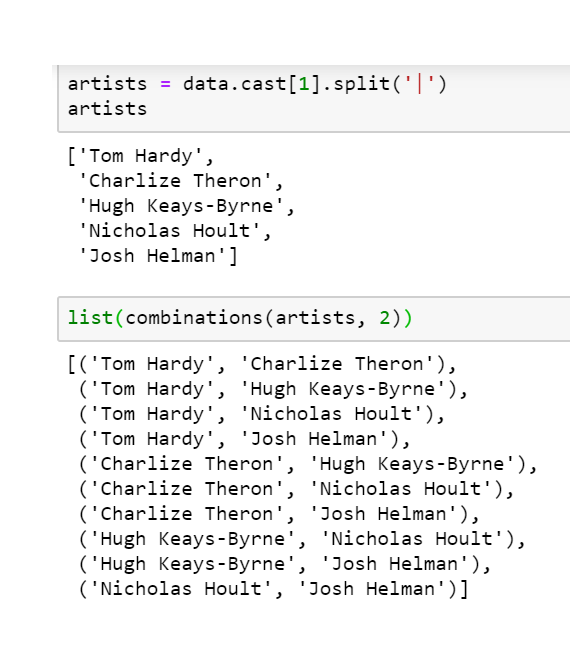Screen Shot 2020-07-08 at 3.11.04 PM.png 




Pavlo Zakharov  2 months ago
а вот - если сет
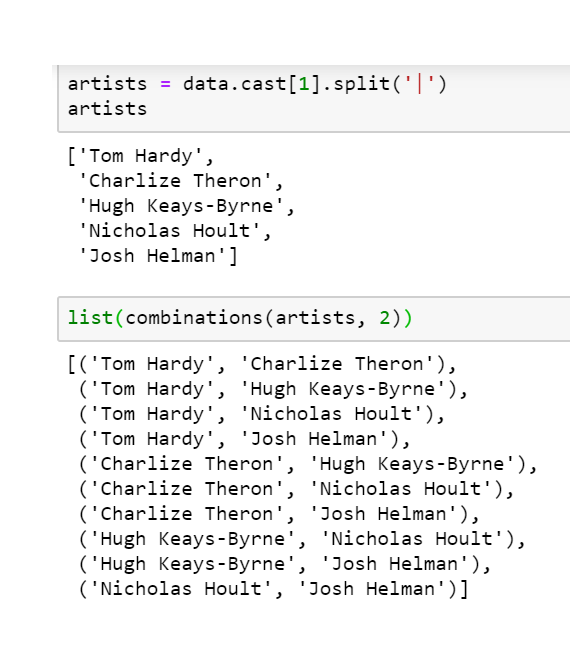Screen Shot 2020-07-08 at 3.11.04 PM.png



Polina Seliukh  2 months ago
Я смотрю на их общее количество

Polina Seliukh  2 months ago
Оно одинаковое выходит

Pavlo Zakharov  2 months ago
колличество не меняется,

Pavlo Zakharov  2 months ago
в первом случае у нас 7 инстансов (Rupert Grint, Emma Watson)

Pavlo Zakharov  2 months ago
и один инстанс (Emma Watson, Rupert Grint)

Pavlo Zakharov  2 months ago
во втором случае - 8 инстансов (Emma Watson, Rupert Grint)

Pavlo Zakharov  2 months ago
потому что для сета порядок не важен

Pavlo Zakharov  2 months ago
а общее количество такое же

Pavlo Zakharov  2 months ago
а для листа - важен

Polina Seliukh  2 months ago

set(y) for x in pairs for y in x

А как словами озвучить эту команду?
Типа x перебирает все записи в pairs, а вот что У делает ?

Pavlo Zakharov  2 months ago

х перебирает переберает записи в каждом itertools.combinations объекте

Pavlo Zakharov  2 months ago
они итерируемые

Pavlo Zakharov  2 months ago

каждый itertools.combinations содержит в себе число сочетаний из актеров данного фильма по 2

Pavlo Zakharov  2 months ago

то есть не число

Pavlo Zakharov  2 months ago

а варианты, как можно разбить по парам

Pavlo Zakharov  2 months ago
то есть мы вытягиваем условно говоря массив из массивов из пар в просто массив из пар

Pavlo Zakharov  2 months ago

есть такая операция flatten в функциональном программировании, вот собственно оно это и делает с листом

Pavlo Zakharov  2 months ago

а потом создает из каждой пары сет

Pavlo Zakharov  2 months ago

.value_counts() показывает количество одинаковых сетов

Pavlo Zakharov  2 months ago

.apply(tuple) только для того, чтоб компайлер не ругался

Pavlo Zakharov  2 months ago

что сет у него анхэшебл тип

Pavlo Zakharov  2 months ago

и да, кстати @Ekaterina Popova задание немного некорректное. Так как у нас нету в дата сете информации о поле актеров и чисто теоретически я могу не знать, что Емма Уотсон - женщина, тогда правильных ответа 3)


Polina Seliukh  2 months ago

Ох, бежали все от указателей в С/С++, и прибежали к каким-то демонам в Python  pairs и то что в нем лежит - это указатели на какое-то нетипизированное нечто, выходит ?

Pavlo Zakharov  2 months ago
там лежат объекты

Pavlo Zakharov  2 months ago
ну да, указатели на объекты

Pavlo Zakharov  2 months ago
<itertools.combinations at 0x7fadd0337dd0>,

Pavlo Zakharov  2 months ago
https://docs.python.org/2/library/itertools.html?highlight=combinations#itertools.combinations

Pavlo Zakharov  2 months ago
хотя я не уверен как листы в стеке или в хипе все хранят и как память работает

Pavlo Zakharov  2 months ago
я на пайтоне ровно неделю пишу, так что для меня тоже многое непонятно

Polina Seliukh  2 months ago
@Serg в вашем варианте отдельно считаются пары (А,В) и (В,А) если я правильно все поняла

Ekaterina Popova  2 months ago
Коллеги, добрый день!
combinations учитывает, что (А,В) и (В,А) - это одно и тоже, поэтому, когда мы берем лист artists (в который записываем всех актеров одного фильма) и применяем
list(combinations(artists, 2))
То на выходе получаем список уникальных комбинаций, они не повторяются

Ekaterina Popova  2 months ago
@Pavlo Zakharov не совсем понимаю, зачем определять пол? Это же не влияет на комбинацию пар актеров

Polina Seliukh  2 months ago
Тут загвоздка в том, что актеры могут собираться не в один общий лист, а в лист листов.ю

Ekaterina Popova  2 months ago
Так мы берем каждую строку датафрейма отдельно в цикле, и поэтому для одной строки получаем:
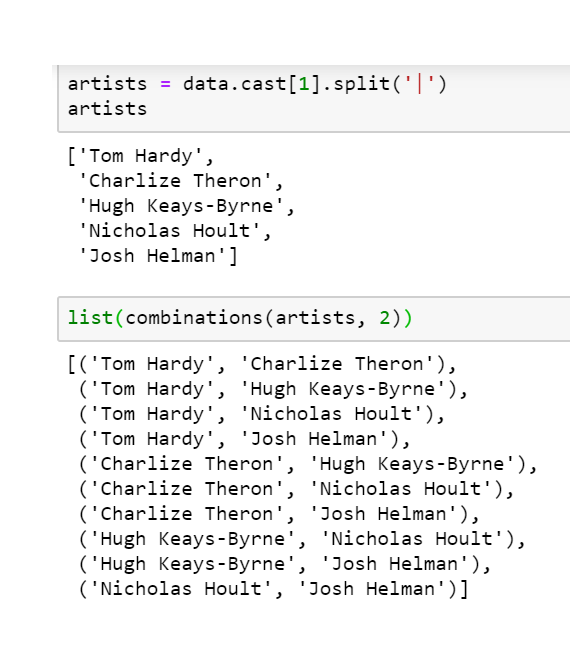


Polina Seliukh  2 months ago
Да, и тогда где-то будет пара Том, Шарлиз, а вдругом фильме Шарлиз,Том

Ekaterina Popova  2 months ago
Вы можете добавить условие, в цикле проверять, что в вашем итоговом словаре нет обратной комбинации и только в таком случае добавлять.
Например, допустим j - это одна из комбинаций, допустим ('Daniel Radcliffe', 'Rupert Grint'), тогда в цикле вы можете составить обратную комбинацию как:
k=(j[1], j[0])
И только если k нет в итоговом вашем словаре (в качестве ключа), увеличивать ключ j на единицу

Pavlo Zakharov  2 months ago
@Ekaterina Popova ну в вариантах ответа в викторине только одна пара актеров, а не 3, поэтому я предположил, что учитывается формулировка “актеров“(мужского пола)

Ekaterina Popova  2 months ago
@Pavlo Zakharov а, поняла вас)
Нет, здесь мы не используем феминитивы 

Pavlo Zakharov  2 months ago
это радует))

In [443]:
#data['list_cast'] = data.cast.str.split('|')
#data.iloc[0].list_cast, 2)
c1 = Counter(itertools.combinations('ABC', 2))
c2 = Counter(itertools.combinations('BDA', 2))
totalc = c1+c2
totalc.most_common()

NameError: name 'itertools' is not defined

In [444]:
cast_values = [x.split(‘|') for x in data[‘cast’]]
pairs = [it.combinations(x, 2) for x in cast_values]
pairs_set = pd.Series([set(y) for x in pairs for y in x]).apply(tuple)

SyntaxError: invalid character in identifier (<ipython-input-444-3db09ccb691f>, line 1)

In [445]:
actors = Counter()
for x in data.cast.str.split('|'):
    actors += Counter(combinations(x, 2))
for actor, count in actors.most_common():
    print(actor, count)


('Daniel Radcliffe', 'Rupert Grint') 8
('Daniel Radcliffe', 'Emma Watson') 8
('Rupert Grint', 'Emma Watson') 7
('Ben Stiller', 'Owen Wilson') 6
('Johnny Depp', 'Helena Bonham Carter') 6
('Adam Sandler', 'Kevin James') 5
('Hugh Jackman', 'Ian McKellen') 5
('Kristen Stewart', 'Robert Pattinson') 5
('Kristen Stewart', 'Taylor Lautner') 5
('Robert Pattinson', 'Taylor Lautner') 5
('Jennifer Lawrence', 'Josh Hutcherson') 4
('Jennifer Lawrence', 'Liam Hemsworth') 4
('Jennifer Lawrence', 'Woody Harrelson') 4
('Josh Hutcherson', 'Liam Hemsworth') 4
('Josh Hutcherson', 'Woody Harrelson') 4
('Liam Hemsworth', 'Woody Harrelson') 4
('Tobin Bell', 'Costas Mandylor') 4
('Tobin Bell', 'Betsy Russell') 4
('Costas Mandylor', 'Betsy Russell') 4
('Vin Diesel', 'Jordana Brewster') 4
('Paul Walker', 'Jordana Brewster') 4
('Mike Myers', 'Eddie Murphy') 4
('Mike Myers', 'Cameron Diaz') 4
('Eddie Murphy', 'Cameron Diaz') 4
('Kristen Stewart', 'Peter Facinelli') 4
('Robert Pattinson', 'Peter Facinelli') 4
('Tay